In [1]:
import numpy as np
import pandas as pd
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/'
img1_path = os.path.join(image_path, 'img.jpg')
img2_path = os.path.join(image_path, 'img2.jpg')

image1 = face_recognition.load_image_file(img1_path)
image2 = face_recognition.load_image_file(img2_path)

img1_face_locations = face_recognition.face_locations(image1)
img2_face_locations = face_recognition.face_locations(image2)

print("Image 1의 얼굴 영역 좌표 : ", img1_face_locations)
print("Image 2의 얼굴 영역 좌표 : ", img2_face_locations)

Image 1의 얼굴 영역 좌표 :  [(116, 255, 206, 165)]
Image 2의 얼굴 영역 좌표 :  [(491, 847, 812, 526)]


In [2]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    return cropped_face

In [34]:
def show_face_image(image_file0):
    image_path0 = os.path.dirname(os.path.abspath('__file__')) + r'/data/'
    img_path0 = os.path.join(image_path0, image_file0)
    image0 = face_recognition.load_image_file(img_path0)
    img_face_locations0 = face_recognition.face_locations(image0)
    a0, b0, c0, d0 = img_face_locations0[0]
    cropped_face0 = image0[a0:c0,d0:b0,:]
    return plt.imshow(cropped_face0)

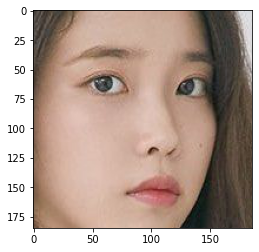

In [35]:
show_face_image('아이유.jpg')

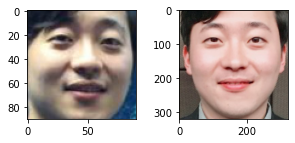

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

a1, b1, c1, d1 = img1_face_locations[0]
a2, b2, c2, d2 = img2_face_locations[0]
cropped_face1 = image1[a1:c1,d1:b1,:]
cropped_face2 = image2[a2:c2,d2:b2,:]

plt.figure(figsize=(5, 2))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(cropped_face1)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.
ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(cropped_face2)

In [6]:
import os

dir_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['기성용.jpg', '심수창.jpeg', '이동휘.jpg', '사쿠라.jpg', '리암 니슨.png', '브래들리 쿠퍼.jpg', '아이즈원김채원.jpg', '조원희.jpg', '황병국.jpg', '배성우.png', '비니.jpg', '제프리 힌턴.jpg', '박해일.jpeg', '사무엘 L 잭슨.jpg', '조승우.jpeg', '이대형.jpg', '박건우.png', '박찬호.jpg', '신비.jpg', '박항서.jpg', '이승철.jpeg', '톰 홀랜드.jpg', '지드래곤.jpeg', '유재석.jpg', '매드클라운.jpeg', '개리.jpg', '박휘순.jpg', '슈가.jpg', '정민철.jpg', '야마다 타카유키.jpeg', '채연.jpg', '리아.jpg', '수호.jpg', '이범수.jpeg', '온앤오프효진.jpg', '이안 굿펠로우.jpg', '조정석.jpg', '이희준.jpg', '고창석.jpeg', '트와이스미나.jpg', '박희순.jpg', '여자아이들수진.jpeg', '윤아.jpg', '개코.jpeg', '유희열.jpeg', '조달환.png', '유해진.jpg', '꽈두룹.jpeg', '세훈.jpg', '김민재.jpeg', '아이유.jpg', '노무현.jpeg', '최양락.jpg', '윤도현.png', '슬리피.jpg', '승희.jpeg', '하현우.jpg', '켄 정.jpeg', '홍구.jpg', '이용진.jpg', '손호준.jpeg', '하승진.jpg', '이종석.jpeg', '윤균상.jpg', '이성민.jpg', '철면수심.jpg', '윤종신.jpeg', '정우성.jpeg', '유리.jpg', '김경진.png', '오재원.jpg', '최민식.jpg', '도아.jpeg', '트와이스나연.jpg', '목진화.png', '클린트 이스트우드.jpg', '김C.jpeg', '스윙스.jpeg', '박서준.jpeg', '한석규.jpg', '백현.jpg', '티모시 달튼.jpeg', '트와이스다현.jpeg', '최무성.j

In [7]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding1 = get_face_embedding(cropped_face1)
embedding2 = get_face_embedding(cropped_face2)


distances = np.linalg.norm(embedding1[0] - embedding2[0])
print(distances)

0.2736577695057393


In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            pass
    return embedding_dict

In [9]:
dir_path = os.path.dirname(os.path.abspath('__file__')) + r'/data/celebrity'
embedding_dict = get_face_embedding_dict(dir_path)
print("슝=3")

슝=3


In [10]:
embedding_dict['아이린']

array([-0.10181993,  0.0792945 ,  0.00718645, -0.11879459, -0.08135005,
       -0.04299912, -0.05773572, -0.11321767,  0.15138896, -0.20885536,
        0.18029802, -0.13891761, -0.2228189 , -0.00120888, -0.08301609,
        0.24276286, -0.13112383, -0.1263323 , -0.07051141,  0.01983991,
        0.1100051 ,  0.06254245, -0.0649927 ,  0.10676218, -0.0168392 ,
       -0.28969833, -0.14053422, -0.01125028, -0.01945227, -0.07790256,
       -0.08217344,  0.03632969, -0.15188603, -0.04739347,  0.02344305,
        0.15661386, -0.01905783, -0.11563402,  0.12024577,  0.02981472,
       -0.28560558,  0.10640109,  0.11470322,  0.26011181,  0.15611397,
       -0.00350353, -0.01439168, -0.19605426,  0.11402891, -0.17554668,
        0.02433301,  0.09433556,  0.08332573,  0.07521394,  0.04545395,
       -0.1121228 ,  0.06941445,  0.09918614, -0.15369162,  0.0078676 ,
        0.15859944, -0.08083049, -0.03088866, -0.1229291 ,  0.17480747,
        0.10221741, -0.1016369 , -0.25470114,  0.14337   , -0.20

In [11]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('아이유', '성룡')

0.7623598571818267

In [12]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('아이유')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [13]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('아이유',
  array([-0.04447619,  0.06941088,  0.07166822, -0.11115204, -0.15136021,
          0.02857133, -0.10124493, -0.07531519,  0.15766114, -0.18886763,
          0.22153744, -0.07278857, -0.22954154, -0.02295676, -0.0765749 ,
          0.24378185, -0.19777068, -0.13430703,  0.02336288,  0.02791995,
          0.109535  ,  0.05235298, -0.04675045,  0.03217059, -0.09556486,
         -0.35927975, -0.13184555, -0.00173077, -0.07313325, -0.08913573,
         -0.07444745,  0.07746162, -0.15909475, -0.0032743 ,  0.00573899,
          0.10974467, -0.03056322, -0.10782501,  0.09141426,  0.02825631,
         -0.25381392,  0.07413186,  0.09172238,  0.23857878,  0.14819503,
         -0.02640465, -0.00138278, -0.12099289,  0.05279358, -0.20967156,
          0.00119446,  0.12782846,  0.06208404,  0.05136997,  0.02820536,
         -0.09033325,  0.00961942,  0.10615807, -0.08977545,  0.03688592,
          0.12444032, -0.11202489, -0.00731818, -0.14017452,  0.19074444,
          0.09625471, -0.1166

In [28]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i+1][0], sort_key_func(sorted_faces[i+1][0])))

In [29]:
embedding_dict['문정호'] = embedding2[0]

In [30]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('문정호')

순위 1 : 이름(슬리피), 거리(0.43228384764117295)
순위 2 : 이름(하현우), 거리(0.436813835095304)
순위 3 : 이름(목진화), 거리(0.4380801014591406)
순위 4 : 이름(박휘순), 거리(0.43911817174446904)


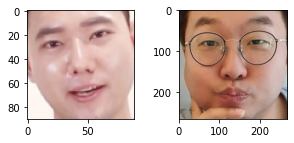

In [38]:
plt.figure(figsize=(5, 2))
ax1 = plt.subplot(1, 2, 1)
ax1 = show_face_image('목진화.png')
ax2 = plt.subplot(1, 2, 2)
ax2 = show_face_image('박휘순.jpg')

## 박휘순이라니..